<a href="https://colab.research.google.com/github/maacunap76/Especiaizacion_ML_Deep_DMC/blob/main/Supervised_models/DecisionTrees_Boosting/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a> 
10. <a href="#item34">RandomSearch</a> 
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn 
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("/santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
pddf.shape

(76020, 371)

In [4]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

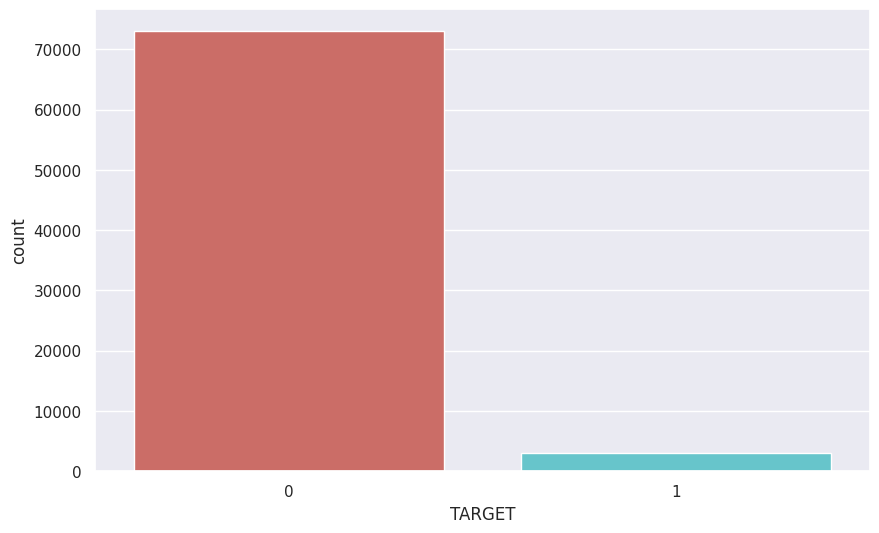

In [5]:
# Analizando el target 
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [6]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [7]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['saldo_var41',
 'num_var13',
 'num_var39_0',
 'num_var45_hace2',
 'delta_imp_reemb_var33_1y3',
 'ind_var13_0',
 'var3',
 'num_op_var41_hace2',
 'saldo_var32',
 'num_var24',
 'num_aport_var13_ult1',
 'num_var37',
 'saldo_medio_var44_ult3',
 'imp_aport_var33_hace3',
 'saldo_var2_ult1',
 'ind_var13_largo_0',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_aport_var33_1y3',
 'delta_imp_aport_var13_1y3',
 'num_var5',
 'ind_var12_0',
 'num_var18_0',
 'imp_aport_var17_hace3',
 'delta_imp_compra_var44_1y3',
 'num_var26',
 'saldo_var26',
 'num_var1',
 'num_var37_0',
 'imp_amort_var34_hace3',
 'imp_trasp_var17_in_hace3',
 'ind_var20',
 'saldo_medio_var29_hace2',
 'num_var13_medio',
 'num_var45_ult1',
 'delta_num_aport_var13_1y3',
 'saldo_medio_var12_hace3',
 'saldo_var14',
 'num_var43_emit_ult1',
 'delta_imp_trasp_var17_out_1y3',
 'delta_num_trasp_var17_in_1y3',
 'num_op_var40_ult1',
 'num_trasp_var33_out_hace3',
 'saldo_medio_var8_ult3',
 'num_var34_0',
 'num_var25',
 'num_var5_0',
 'num_var28_0'

In [5]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [10]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [11]:
y_train.mean()

0.039576051415041155

In [12]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [13]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [14]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

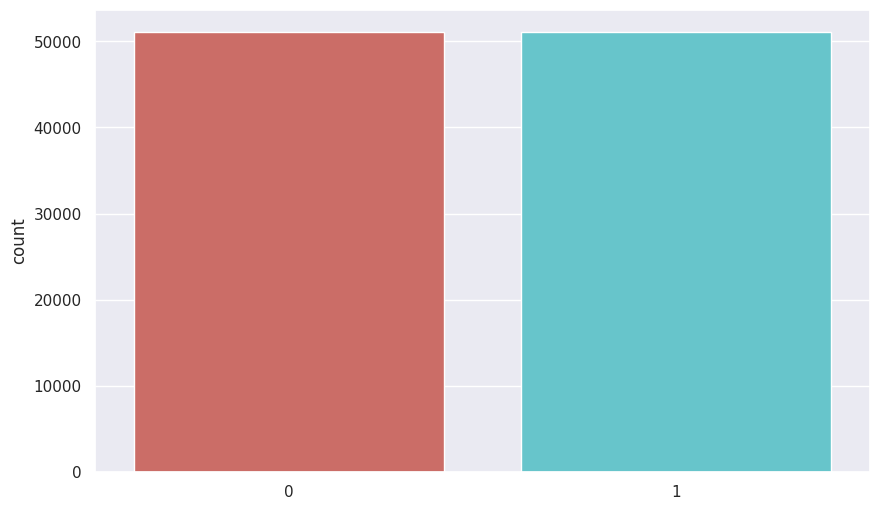

In [15]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [16]:
# Cargar librerías 

from sklearn.tree import DecisionTreeClassifier #para clasificacion
from sklearn.tree import DecisionTreeRegressor #para regresion


In [17]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5, #profundidad
                               #criterion = "entropy", por defecto se corta mediante gini, si deseo le pongo la entropia
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,#cantidad minima de observaciones en cada nodo, si pones menos de 1 el algoritmo lo entiende como porcentaje y si es mas de uno lo entiende como cantidad
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)
    
dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [18]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('/tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [19]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [20]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [21]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [22]:
y_train.shape[0] - y_train.sum()

51108

In [23]:
y_train.sum()

2106

In [24]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [25]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5, 
                               class_weight = {0: 1, 1: 24.267},#le pongo pesos al cero o al 1
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)
    
dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [26]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [27]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.803175
1,Gini,0.640132,0.606351
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [28]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5, 
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)
    
# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.803175,0.823127,0.805164
1,Gini,0.601789,0.598221,0.640132,0.606351,0.646253,0.610328
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [30]:
X_train['TARGET'] = y_train

<Axes: >

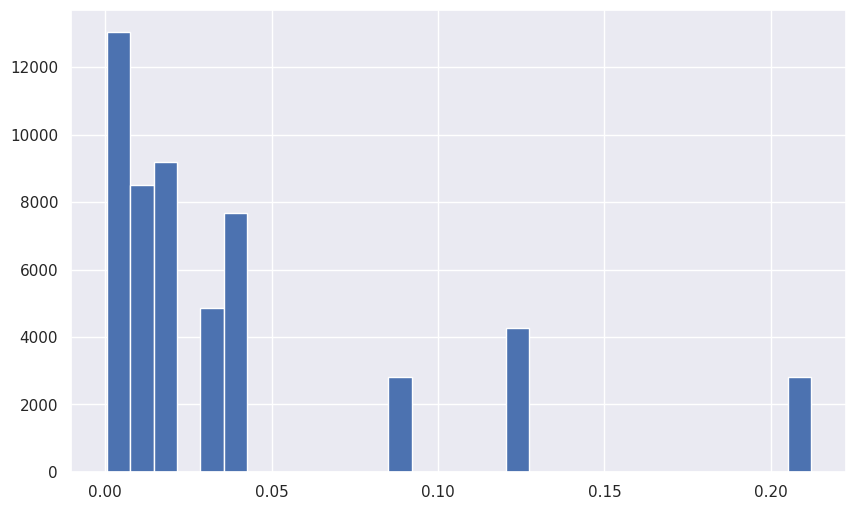

In [31]:
X_train.probability_unb.hist(bins = 30)

In [32]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

<Axes: >

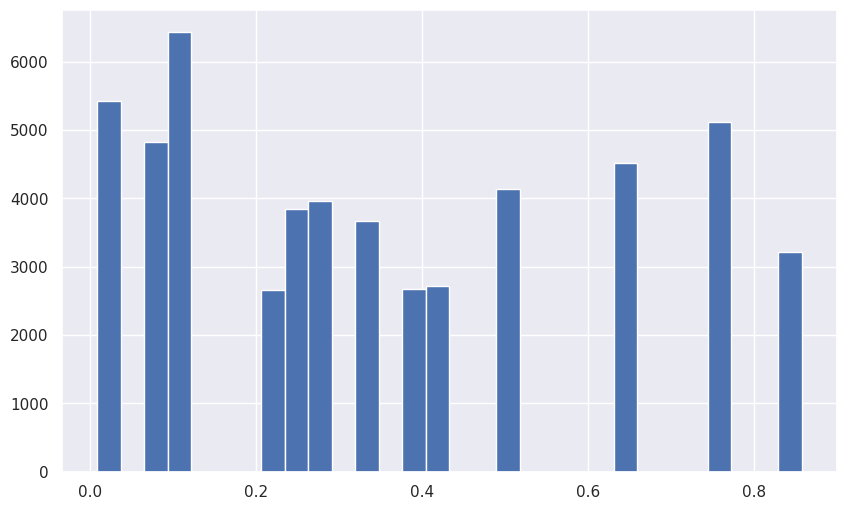

In [33]:
X_train.probability.hist(bins = 30)

In [34]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>
 
 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test. 



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.
 



 
Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [35]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [36]:
# Definiendo grid de los parámetros a probar

parameters = {'max_depth': np.linspace(2, 15, 14),
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [37]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [38]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


ValueError: ignored

In [ ]:
GridSearch.best_params_

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [ ]:

# Calling Method 
plot_search_results(GridSearch)


In [39]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6, 
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)
    
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [40]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [41]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [42]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt          

,metric,dTree_train,dTree_test
0,AUC,0.808715,0.798743
1,Gini,0.617431,0.597487
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [43]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808715,0.798743
1,Gini,0.601789,0.598221,0.617431,0.597487
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [44]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [45]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
349,ind_var30,0.489990
291,var15,0.279996
162,saldo_var30,0.068183
98,imp_op_var41_efect_ult3,0.044417
93,var38,0.039043
234,saldo_var37,0.021746
249,ind_var37_cte,0.018887
306,num_var22_ult3,0.015889
367,num_var22_ult1,0.006266
59,num_var4,0.005826


# Random Forest

In [46]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [47]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [48]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,#numero de arboles
                             max_depth = 8, #profundidad
                             min_samples_leaf = 0.01,#porcentaje de evidencias en cada nodo
                             class_weight = {0: 1, 1: 24.267},
                             oob_score = True,
                             verbose = 1, #cada cuantos itreaciones quieres q te arroje resultado
                             n_jobs = 4,#cantidad de paralelizaciones, puedes trabajar 4 arboles de decision a la vez, avanza de 4 en 4 hasta llegar a 100
                             random_state = 123)#semilla aleatoria

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se 
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [49]:
import multiprocessing
multiprocessing.cpu_count()

4

In [50]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


----2.9279532432556152 seconds ---


In [51]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
291,var15,1.749353e-01
275,saldo_var5,7.476310e-02
286,saldo_var42,6.883922e-02
162,saldo_var30,6.396901e-02
75,num_var35,6.087023e-02
...,...,...
278,num_var14_0,7.882419e-05
102,ind_var25_0,7.608827e-05
122,ind_var37_0,4.612764e-05
20,num_var37,1.475249e-05


In [52]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left') 
metricsRes        

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.809338,0.803944
1,Gini,0.601789,0.598221,0.618676,0.607888
2,Accuracy,0.783309,0.788389,0.704702,0.704902
3,Precision,0.112491,0.115143,0.090909,0.091075
4,Recall,0.649573,0.650776,0.717949,0.719512
5,F1-score,0.191771,0.195667,0.161383,0.161684


# AdaBoost

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [ ]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,#ratio de aprendizaje en cada arbol
          random_state = 123)


In [ ]:
start_time = time.time()
ada_clf.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----50.273513317108154 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
345,var38,0.075
173,var15,0.065
41,saldo_var30,0.050
180,saldo_medio_var5_hace3,0.050
26,imp_op_var39_comer_ult1,0.040
...,...,...
342,saldo_var17,0.005
35,saldo_medio_var12_hace3,0.005
40,saldo_var31,0.005
176,saldo_medio_var13_corto_hace3,0.005


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [ ]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left') 
metricsRes        

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.800894,0.799110,0.802236,0.800265,0.858622,0.821658
1,Gini,0.601789,0.598221,0.604472,0.600530,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.708009,0.707928,0.960631,0.960405
3,Precision,0.112491,0.115143,0.089687,0.089990,0.720000,0.444444
4,Recall,0.649573,0.650776,0.697056,0.700665,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.158926,0.159495,0.016893,0.008782


# XGBoost

In [6]:
# Muestreo de data
#Train 60%  Test 20% WatchList 20%
#El WatchList es para hacer seguimiento al error

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,#para cuando se muestree se mantenga la misma proporcion de 0 y 1 en train y test
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test, 
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


In [7]:
# Cargando librerías

import numpy as np
import xgboost as xgb


In [8]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [11]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',#tipo del modelo, en este caso es un modelo de target logistico
         'max_depth' : 8,#profundidad
         'learning_rate': 0.05,#cuanto va a aprender el modelo nuevo del modelo anterior, cuanto del modelado del error del arbol pasado le voy a creer y lo voy a utilizar en el arbol siguiente
         'min_data_leaf' : 0.05,# cuantas observaciones en las hojas finales del arbol en porcentaje
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc' #metrica de evaluacion, que en modelos de de clasificacion el AUC es lo mas indicado
num_round = 300   #numero de arboles a evaluar      
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [12]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist)#, 
                   # early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[04:53:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.84292	watchlist-auc:0.80072
[1]	train-auc:0.84437	watchlist-auc:0.80096
[2]	train-auc:0.84804	watchlist-auc:0.80306
[3]	train-auc:0.84918	watchlist-auc:0.80403
[4]	train-auc:0.85069	watchlist-auc:0.80350
[5]	train-auc:0.85591	watchlist-auc:0.80377
[6]	train-auc:0.85652	watchlist-auc:0.80264
[7]	train-auc:0.85795	watchlist-auc:0.80349
[8]	train-auc:0.86179	watchlist-auc:0.80597
[9]	train-auc:0.86267	watchlist-auc:0.80595
[10]	train-auc:0.86425	watchlist-auc:0.80619
[11]	train-auc:0.86506	watchlist-auc:0.80702
[12]	train-auc:0.86616	watchlist-auc:0.80650
[13]	train-auc:0.86798	watchlist-auc:0.80651
[14]	train-auc:0.86896	watchlist-auc:0.80707
[15]	train-auc:0.86957	watchlist-auc:0.80735
[16]	train-auc:0.87061	watchlist-auc:0.80757
[17]	train-auc:0.87221	watchlist-auc:0.80996
[18]	train-auc:0.87357	watchlist-auc:0.81013
[19]	train-auc:0.87427	watchlist-auc:0.81044
[20]	tr

In [13]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist, 
                    early_stopping_rounds = 5)#me dice que cuando decae el auc 5 veces seguidas ahi para las iteraciones
print("----%s seconds ---" % ((time.time() - start_time)))


[04:56:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.84292	watchlist-auc:0.80072
[1]	train-auc:0.84437	watchlist-auc:0.80096
[2]	train-auc:0.84804	watchlist-auc:0.80306
[3]	train-auc:0.84918	watchlist-auc:0.80403
[4]	train-auc:0.85069	watchlist-auc:0.80350
[5]	train-auc:0.85591	watchlist-auc:0.80377
[6]	train-auc:0.85652	watchlist-auc:0.80264
[7]	train-auc:0.85795	watchlist-auc:0.80349
[8]	train-auc:0.86179	watchlist-auc:0.80597
[9]	train-auc:0.86267	watchlist-auc:0.80595
[10]	train-auc:0.86425	watchlist-auc:0.80619
[11]	train-auc:0.86506	watchlist-auc:0.80702
[12]	train-auc:0.86616	watchlist-auc:0.80650
[13]	train-auc:0.86798	watchlist-auc:0.80651
[14]	train-auc:0.86896	watchlist-auc:0.80707
[15]	train-auc:0.86957	watchlist-auc:0.80735
[16]	train-auc:0.87061	watchlist-auc:0.80757
[17]	train-auc:0.87221	watchlist-auc:0.80996
[18]	train-auc:0.87357	watchlist-auc:0.81013
[19]	train-auc:0.87427	watchlist-auc:0.81044
[20]	tr

<b>Variables del Modelo</b>

In [15]:
importance = xgBoost.get_score(importance_type = 'total_gain')#gain es cuanto la variable ha impactado en corregir el error en su respectivo modelo
importance

{'num_var13': 1.0761183500289917,
 'num_var39_0': 24.77056884765625,
 'num_var45_hace2': 99.45491027832031,
 'ind_var13_0': 0.3383767604827881,
 'var3': 32.405208587646484,
 'num_op_var41_hace2': 32.970272064208984,
 'saldo_var32': 2.452594518661499,
 'num_var24': 2.774078607559204,
 'num_aport_var13_ult1': 1.5094387531280518,
 'num_var37': 21.025476455688477,
 'imp_aport_var33_hace3': 0.8739044070243835,
 'delta_imp_aport_var13_1y3': 0.38469427824020386,
 'num_var5': 8.333758354187012,
 'ind_var12_0': 4.169057369232178,
 'num_var26': 5.848977088928223,
 'saldo_var26': 13.339614868164062,
 'num_var1': 0.19826769828796387,
 'num_var45_ult1': 42.718971252441406,
 'saldo_medio_var12_hace3': 6.300219535827637,
 'saldo_var14': 2.7729032039642334,
 'num_var43_emit_ult1': 9.976556777954102,
 'num_op_var40_ult1': 3.156261682510376,
 'saldo_medio_var8_ult3': 40.92430114746094,
 'num_var25': 0.1977081298828125,
 'num_var5_0': 13.837916374206543,
 'num_op_var39_comer_ult3': 21.02069854736328,
 's

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

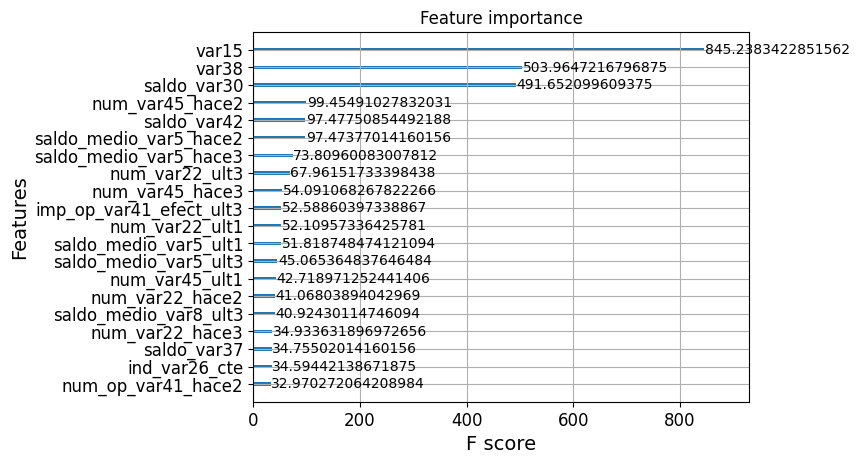

In [16]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [17]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
118,var15,845.238342,1
113,var38,503.964722,2
119,saldo_var30,491.652100,3
2,num_var45_hace2,99.454910,4
32,saldo_var42,97.477509,5
...,...,...,...
85,ind_var30,0.315330,116
47,ind_var40_0,0.252908,117
16,num_var1,0.198268,118
23,num_var25,0.197708,119


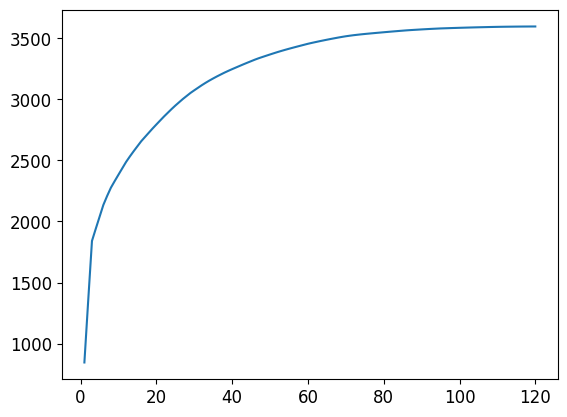

In [18]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

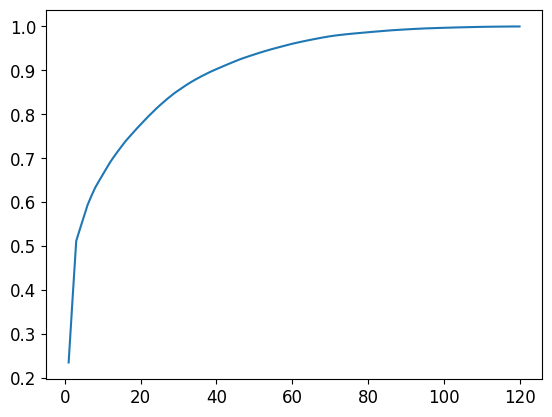

In [19]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [20]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [21]:
pdVarImp.transpose()

,118,113,119,2,32,71,110,30,81,28,...,45,116,11,76,3,85,47,16,23,72
Feature,var15,var38,saldo_var30,num_var45_hace2,saldo_var42,saldo_medio_var5_hace2,saldo_medio_var5_hace3,num_var22_ult3,num_var45_hace3,imp_op_var41_efect_ult3,...,num_meses_var12_ult3,ind_var9_ult1,delta_imp_aport_var13_1y3,imp_aport_var13_ult1,ind_var13_0,ind_var30,ind_var40_0,num_var1,num_var25,num_op_var41_hace3
Importance,845.238342,503.964722,491.6521,99.45491,97.477509,97.47377,73.809601,67.961517,54.091068,52.588604,...,0.53153,0.474224,0.384694,0.341095,0.338377,0.31533,0.252908,0.198268,0.197708,0.072022
C,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
porc_gain,0.234968,0.140098,0.136675,0.027648,0.027098,0.027097,0.020518,0.018893,0.015037,0.014619,...,0.000148,0.000132,0.000107,0.000095,0.000094,0.000088,0.00007,0.000055,0.000055,0.00002
porc_gain_acum,0.234968,0.375066,0.511741,0.539388,0.566486,0.593583,0.614101,0.632994,0.648031,0.66265,...,0.999284,0.999416,0.999523,0.999618,0.999712,0.9998,0.99987,0.999925,0.99998,1.0


In [22]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [23]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
#metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left') 
#metricsRes       

,metric,xgb_train,xgb_test
0,AUC,0.901820,0.846318
1,Gini,0.803639,0.692636
2,Accuracy,0.963058,0.960142
3,Precision,1.000000,0.272727
4,Recall,0.066482,0.004992
5,F1-score,0.124675,0.009804


# Random Search

In [25]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [27]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [28]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [29]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10     

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0
[05:13:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.83994	valid-auc:0.81854
[9]	train-auc:0.84401	valid-auc:0.82307
****** Iteration : 1
[05:13:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83872	valid-auc:0.81357
[5]	train-auc:0.84860	valid-auc:0.81993
[9]	train-auc:0.85393	valid-auc:0.82444
****** Iteration : 2
[05:13:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80796
[5]	train-auc:0.84241	valid-auc:0.81655
[9]	train-auc:0.84534	valid-auc:0.82097
****** Iteration : 3
[05:13:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80796
[5]	train-auc:0.84977	valid-auc:0.82105
[9]	train-auc:0.85819	valid-auc:0.82610
****** Iteration : 4
[05:13:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84269	valid-auc:0.81079
[5]	train-auc:0.86819	valid-auc:0.82574
[9]	train-auc:0.87725	valid-auc:0.82900
****** Iteration : 5


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[05:13:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85132	valid-auc:0.81079
[5]	train-auc:0.86402	valid-auc:0.81459
[9]	train-auc:0.87379	valid-auc:0.81862
****** Iteration : 6
[05:13:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86572	valid-auc:0.79900
[5]	train-auc:0.86941	valid-auc:0.80606
[9]	train-auc:0.87153	valid-auc:0.80802
****** Iteration : 7
[05:13:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83176	valid-auc:0.80842
[5]	train-auc:0.83299	valid-auc:0.81006
[9]	train-auc:0.83297	valid-auc:0.81017
****** Iteration : 8
[05:13:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 9
[05:13:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86096	valid-auc:0.80566
[5]	train-auc:0.86695	valid-auc:0.81022
[9]	train-auc:0.87172	valid-auc:0.81238
****** Iteration : 10
[05:13:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80796
[5]	train-auc:0.83446	valid-auc:0.81113
[9]	train-auc:0.83459	valid-auc:0.81168
****** Iteration : 11
[05:13:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84197	valid-auc:0.80856
[5]	train-auc:0.86101	valid-auc:0.82088
[9]	train-auc:0.86698	valid-auc:0.82633
****** Iteration : 12
[05:14:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85220	valid-auc:0.81217
[5]	train-auc:0.87744	valid-auc:0.81882
[9]	train-auc:0.89023	valid-auc:0.82362
****** Iteration : 13
[05:14:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85604	valid-auc:0.81141
[5]	train-auc:0.88568	valid-auc:0.81963
[9]	train-auc:0.89892	valid-auc:0.82487
****** Iteration : 14
[05:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84161	valid-auc:0.81069
[5]	train-auc:0.84531	valid-auc:0.81402
[9]	train-auc:0.84715	valid-auc:0.81457
****** Iteration : 15
[05:14:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84143	valid-auc:0.81077
[5]	train-auc:0.84688	valid-auc:0.81526
[9]	train-auc:0.84993	valid-auc:0.81754
****** Iteration : 16
[05:14:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83172	valid-auc:0.80783
[5]	train-auc:0.83995	valid-auc:0.81650
[9]	train-auc:0.84511	valid-auc:0.81910
****** Iteration : 17
[05:14:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84733	valid-auc:0.80992
[5]	train-auc:0.86200	valid-auc:0.81855
[9]	train-auc:0.86959	valid-auc:0.82261
****** Iteration : 18
[05:14:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84925	valid-auc:0.80872
[5]	train-auc:0.86178	valid-auc:0.81700
[9]	train-auc:0.86995	valid-auc:0.82185
****** Iteration : 19
[05:14:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.77464	valid-auc:0.76449
[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 20
[05:14:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84822	valid-auc:0.80998
[5]	train-auc:0.85190	valid-auc:0.81365
[9]	train-auc:0.85500	valid-auc:0.81467
****** Iteration : 21
[05:15:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83272	valid-auc:0.80807
[5]	train-auc:0.83460	valid-auc:0.81099
[9]	train-auc:0.83465	valid-auc:0.81104
****** Iteration : 22
[05:15:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 23
[05:15:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81641	valid-auc:0.79467
[5]	train-auc:0.83607	valid-auc:0.81470
[9]	train-auc:0.84141	valid-auc:0.81909
****** Iteration : 24
[05:15:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84822	valid-auc:0.80998
[5]	train-auc:0.86949	valid-auc:0.81838
[9]	train-auc:0.87704	valid-auc:0.82575
****** Iteration : 25
[05:15:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80641	valid-auc:0.78663
[5]	train-auc:0.82060	valid-auc:0.80282
[9]	train-auc:0.82484	valid-auc:0.80737
****** Iteration : 26
[05:15:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84448	valid-auc:0.81060
[5]	train-auc:0.85788	valid-auc:0.81910
[9]	train-auc:0.86274	valid-auc:0.82124
****** Iteration : 27
[05:15:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84409	valid-auc:0.80983
[5]	train-auc:0.85547	valid-auc:0.81874
[9]	train-auc:0.86207	valid-auc:0.82210
****** Iteration : 28
[05:15:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80828
[5]	train-auc:0.84553	valid-auc:0.81930
[9]	train-auc:0.85248	valid-auc:0.82536
****** Iteration : 29
[05:15:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85604	valid-auc:0.81141
[5]	train-auc:0.88568	valid-auc:0.81963
[9]	train-auc:0.89892	valid-auc:0.82487
****** Iteration : 30
[05:15:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80643	valid-auc:0.78672
[5]	train-auc:0.83182	valid-auc:0.81682
[9]	train-auc:0.83991	valid-auc:0.82202
****** Iteration : 31
[05:15:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85975	valid-auc:0.80884
[5]	train-auc:0.86437	valid-auc:0.81320
[9]	train-auc:0.87000	valid-auc:0.81334
****** Iteration : 32
[05:15:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83516	valid-auc:0.80802
[5]	train-auc:0.84618	valid-auc:0.81770
[9]	train-auc:0.85075	valid-auc:0.82092
****** Iteration : 33
[05:16:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85474	valid-auc:0.80876
[5]	train-auc:0.87707	valid-auc:0.81909
[9]	train-auc:0.88521	valid-auc:0.82165
****** Iteration : 34
[05:16:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83976	valid-auc:0.81330
[5]	train-auc:0.85388	valid-auc:0.82423
[9]	train-auc:0.85898	valid-auc:0.82741
****** Iteration : 35
[05:16:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.83988	valid-auc:0.81870
[9]	train-auc:0.84422	valid-auc:0.82253
****** Iteration : 36
[05:16:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85671	valid-auc:0.80758
[5]	train-auc:0.86049	valid-auc:0.81135
[9]	train-auc:0.86250	valid-auc:0.81047
****** Iteration : 37
[05:16:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83872	valid-auc:0.81357
[5]	train-auc:0.84370	valid-auc:0.81671
[9]	train-auc:0.84751	valid-auc:0.81939
****** Iteration : 38
[05:16:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80796
[5]	train-auc:0.84472	valid-auc:0.81895
[9]	train-auc:0.85037	valid-auc:0.82322
****** Iteration : 39
[05:16:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80796
[5]	train-auc:0.84472	valid-auc:0.81895
[9]	train-auc:0.85037	valid-auc:0.82322
****** Iteration : 40
[05:16:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85581	valid-auc:0.80642
[5]	train-auc:0.85955	valid-auc:0.80984
[9]	train-auc:0.86119	valid-auc:0.81099
****** Iteration : 41
[05:16:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86075	valid-auc:0.80442
[5]	train-auc:0.89401	valid-auc:0.81600
[9]	train-auc:0.90750	valid-auc:0.81776
****** Iteration : 42
[05:16:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85220	valid-auc:0.81217
[5]	train-auc:0.85632	valid-auc:0.81410
[9]	train-auc:0.85783	valid-auc:0.81429
****** Iteration : 43
[05:17:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85585	valid-auc:0.80581
[5]	train-auc:0.87677	valid-auc:0.82177
[9]	train-auc:0.88540	valid-auc:0.82256
****** Iteration : 44
[05:17:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85220	valid-auc:0.81217
[5]	train-auc:0.87744	valid-auc:0.81882
[9]	train-auc:0.89023	valid-auc:0.82362
****** Iteration : 45
[05:17:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79555
[5]	train-auc:0.82059	valid-auc:0.79852
[9]	train-auc:0.82434	valid-auc:0.80218
****** Iteration : 46
[05:17:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.82213	valid-auc:0.80443
[9]	train-auc:0.82619	valid-auc:0.80870
****** Iteration : 47
[05:17:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86552	valid-auc:0.79876
[5]	train-auc:0.88935	valid-auc:0.81708
[9]	train-auc:0.90130	valid-auc:0.82196
****** Iteration : 48
[05:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85482	valid-auc:0.81034
[5]	train-auc:0.89213	valid-auc:0.82321
[9]	train-auc:0.91185	valid-auc:0.82264
****** Iteration : 49
[05:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87002	valid-auc:0.79632
[5]	train-auc:0.88712	valid-auc:0.80776
[9]	train-auc:0.89505	valid-auc:0.81393
****** Iteration : 50
[05:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79555
[5]	train-auc:0.82495	valid-auc:0.80260
[9]	train-auc:0.82928	valid-auc:0.80643
****** Iteration : 51
[05:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84931	valid-auc:0.80891
[5]	train-auc:0.86193	valid-auc:0.81518
[9]	train-auc:0.86934	valid-auc:0.82006
****** Iteration : 52
[05:18:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80795
[5]	train-auc:0.84043	valid-auc:0.81606
[9]	train-auc:0.84344	valid-auc:0.81799
****** Iteration : 53
[05:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85132	valid-auc:0.81079
[5]	train-auc:0.86402	valid-auc:0.81459
[9]	train-auc:0.87379	valid-auc:0.81862
****** Iteration : 54
[05:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86638	valid-auc:0.79707
[5]	train-auc:0.88519	valid-auc:0.80907
[9]	train-auc:0.89330	valid-auc:0.81605
****** Iteration : 55
[05:18:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86638	valid-auc:0.79707
[5]	train-auc:0.87729	valid-auc:0.80504
[9]	train-auc:0.88209	valid-auc:0.80894
****** Iteration : 56
[05:18:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77478	valid-auc:0.76484
[9]	train-auc:0.77478	valid-auc:0.76484
****** Iteration : 57
[05:18:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82082	valid-auc:0.79837
[5]	train-auc:0.82606	valid-auc:0.80342
[9]	train-auc:0.83126	valid-auc:0.80837
****** Iteration : 58
[05:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86456	valid-auc:0.79826
[5]	train-auc:0.88252	valid-auc:0.81242
[9]	train-auc:0.89083	valid-auc:0.81891
****** Iteration : 59
[05:18:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84542	valid-auc:0.81052
[5]	train-auc:0.85797	valid-auc:0.81634
[9]	train-auc:0.86566	valid-auc:0.81996
****** Iteration : 60
[05:18:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85211	valid-auc:0.81003
[5]	train-auc:0.87745	valid-auc:0.81767
[9]	train-auc:0.88681	valid-auc:0.82374
****** Iteration : 61
[05:18:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81093
[5]	train-auc:0.85508	valid-auc:0.81928
[9]	train-auc:0.86186	valid-auc:0.82256
****** Iteration : 62
[05:19:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81093
[5]	train-auc:0.85508	valid-auc:0.81928
[9]	train-auc:0.86186	valid-auc:0.82256
****** Iteration : 63
[05:19:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86748	valid-auc:0.79664
[5]	train-auc:0.89730	valid-auc:0.81497
[9]	train-auc:0.90812	valid-auc:0.82035
****** Iteration : 64
[05:19:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81093
[5]	train-auc:0.86157	valid-auc:0.82404
[9]	train-auc:0.86741	valid-auc:0.82520
****** Iteration : 65
[05:19:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.83994	valid-auc:0.81854
[9]	train-auc:0.84401	valid-auc:0.82307
****** Iteration : 66
[05:19:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84767	valid-auc:0.80954
[5]	train-auc:0.85544	valid-auc:0.81432
[9]	train-auc:0.85860	valid-auc:0.81556
****** Iteration : 67
[05:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82045	valid-auc:0.79844
[5]	train-auc:0.84303	valid-auc:0.81925
[9]	train-auc:0.85047	valid-auc:0.82440
****** Iteration : 68
[05:19:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84439	valid-auc:0.81007
[5]	train-auc:0.84880	valid-auc:0.81470
[9]	train-auc:0.85003	valid-auc:0.81544
****** Iteration : 69
[05:19:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86552	valid-auc:0.79876
[5]	train-auc:0.90226	valid-auc:0.81482
[9]	train-auc:0.91678	valid-auc:0.81645
****** Iteration : 70
[05:19:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86919	valid-auc:0.79564
[5]	train-auc:0.88740	valid-auc:0.80919
[9]	train-auc:0.89476	valid-auc:0.81474
****** Iteration : 71
[05:20:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84733	valid-auc:0.80992
[5]	train-auc:0.87750	valid-auc:0.82190
[9]	train-auc:0.88685	valid-auc:0.82767
****** Iteration : 72
[05:20:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85604	valid-auc:0.81141
[5]	train-auc:0.87193	valid-auc:0.81507
[9]	train-auc:0.88386	valid-auc:0.81812
****** Iteration : 73
[05:20:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84448	valid-auc:0.81060
[5]	train-auc:0.84814	valid-auc:0.81324
[9]	train-auc:0.84959	valid-auc:0.81374
****** Iteration : 74
[05:20:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83996	valid-auc:0.81316
[5]	train-auc:0.85928	valid-auc:0.82439
[9]	train-auc:0.86872	valid-auc:0.82567
****** Iteration : 75
[05:20:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86456	valid-auc:0.79826
[5]	train-auc:0.88252	valid-auc:0.81242
[9]	train-auc:0.89083	valid-auc:0.81891
****** Iteration : 76
[05:20:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83170	valid-auc:0.80814
[5]	train-auc:0.83293	valid-auc:0.80980
[9]	train-auc:0.83815	valid-auc:0.81335
****** Iteration : 77
[05:20:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85920	valid-auc:0.80182
[5]	train-auc:0.87387	valid-auc:0.81267
[9]	train-auc:0.88327	valid-auc:0.81827
****** Iteration : 78
[05:20:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85482	valid-auc:0.81034
[5]	train-auc:0.89213	valid-auc:0.82321
[9]	train-auc:0.91185	valid-auc:0.82264
****** Iteration : 79
[05:20:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86338	valid-auc:0.79844
[5]	train-auc:0.87985	valid-auc:0.81027
[9]	train-auc:0.88826	valid-auc:0.81671
****** Iteration : 80
[05:21:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84439	valid-auc:0.81007
[5]	train-auc:0.84880	valid-auc:0.81470
[9]	train-auc:0.85003	valid-auc:0.81544
****** Iteration : 81
[05:21:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84439	valid-auc:0.81007
[5]	train-auc:0.86258	valid-auc:0.82222
[9]	train-auc:0.86870	valid-auc:0.82666
****** Iteration : 82
[05:21:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.82597	valid-auc:0.80771
[9]	train-auc:0.83318	valid-auc:0.81638
****** Iteration : 83
[05:21:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82048	valid-auc:0.79842
[5]	train-auc:0.82109	valid-auc:0.79959
[9]	train-auc:0.82488	valid-auc:0.80316
****** Iteration : 84
[05:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.80922	valid-auc:0.78947
[9]	train-auc:0.81325	valid-auc:0.79332
****** Iteration : 85
[05:21:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83522	valid-auc:0.80839
[5]	train-auc:0.84219	valid-auc:0.81468
[9]	train-auc:0.84299	valid-auc:0.81516
****** Iteration : 86
[05:21:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86919	valid-auc:0.79564
[5]	train-auc:0.89601	valid-auc:0.81259
[9]	train-auc:0.90982	valid-auc:0.81750
****** Iteration : 87
[05:21:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86552	valid-auc:0.79876
[5]	train-auc:0.87189	valid-auc:0.80440
[9]	train-auc:0.87844	valid-auc:0.81034
****** Iteration : 88
[05:21:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85671	valid-auc:0.80758
[5]	train-auc:0.89327	valid-auc:0.81887
[9]	train-auc:0.90823	valid-auc:0.82464
****** Iteration : 89
[05:21:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.84255	valid-auc:0.81705
[9]	train-auc:0.84515	valid-auc:0.82021
****** Iteration : 90
[05:21:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84767	valid-auc:0.80954
[5]	train-auc:0.86136	valid-auc:0.81697
[9]	train-auc:0.86947	valid-auc:0.82272
****** Iteration : 91
[05:22:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87002	valid-auc:0.79632
[5]	train-auc:0.88712	valid-auc:0.80776
[9]	train-auc:0.89505	valid-auc:0.81393
****** Iteration : 92
[05:22:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 93
[05:22:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83665	valid-auc:0.80935
[5]	train-auc:0.85088	valid-auc:0.82062
[9]	train-auc:0.85326	valid-auc:0.82119
****** Iteration : 94
[05:22:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81641	valid-auc:0.79467
[5]	train-auc:0.82425	valid-auc:0.80515
[9]	train-auc:0.82916	valid-auc:0.80784
****** Iteration : 95
[05:22:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 96
[05:22:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85942	valid-auc:0.80201
[5]	train-auc:0.88266	valid-auc:0.81970
[9]	train-auc:0.89309	valid-auc:0.82275
****** Iteration : 97
[05:22:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80645	valid-auc:0.78681
[5]	train-auc:0.81416	valid-auc:0.79516
[9]	train-auc:0.81646	valid-auc:0.79871
****** Iteration : 98
[05:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85482	valid-auc:0.81034
[5]	train-auc:0.89213	valid-auc:0.82321
[9]	train-auc:0.91185	valid-auc:0.82264
****** Iteration : 99
[05:22:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83976	valid-auc:0.81330
[5]	train-auc:0.85885	valid-auc:0.82579
[9]	train-auc:0.86789	valid-auc:0.82865


<ipython-input-29-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [30]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
37,4,max_depth,7,75.450465,65.800777
36,4,objetive,binary_logistic,75.450465,65.800777
38,4,learning_rate,0.2,75.450465,65.800777
39,4,seed,123,75.450465,65.800777
40,4,max_leaves,2,75.450465,65.800777
...,...,...,...,...,...
171,19,objetive,binary_logistic,55.261156,53.167085
172,19,max_depth,2,55.261156,53.167085
173,19,learning_rate,0.02,55.261156,53.167085
174,19,seed,123,55.261156,53.167085


In [38]:
#pddf.head()
pddf[pddf['iter'] == 0]

,iter,paramName,paramValue,giniTrain,giniTest
0,0,objetive,binary_logistic,68.801662,64.613653
1,0,max_depth,4,68.801662,64.613653
2,0,learning_rate,0.1,68.801662,64.613653
3,0,seed,123,68.801662,64.613653
4,0,max_leaves,2,68.801662,64.613653
5,0,min_data_leaf,0.1,68.801662,64.613653
6,0,grow_policy,lossguide,68.801662,64.613653
7,0,min_child_weight,9,68.801662,64.613653
8,0,eval_metric,auc,68.801662,64.613653


In [39]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
80,8,eval_metric,auc,56.760268,54.936528,1.823740
201,22,seed,123,56.760268,54.936528,1.823740
202,22,max_leaves,4,56.760268,54.936528,1.823740
203,22,min_data_leaf,0.1,56.760268,54.936528,1.823740
204,22,grow_policy,lossguide,56.760268,54.936528,1.823740
...,...,...,...,...,...,...
647,71,eval_metric,auc,83.356206,63.289299,20.066907
646,71,min_child_weight,10,83.356206,63.289299,20.066907
644,71,min_data_leaf,0.2,83.356206,63.289299,20.066907
629,69,eval_metric,auc,83.356206,63.289299,20.066907


In [40]:
pddf[pddf['iter'] == 8]

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
72,8,objetive,binary_logistic,56.760268,54.936528,1.82374
73,8,max_depth,2,56.760268,54.936528,1.82374
74,8,learning_rate,0.05,56.760268,54.936528,1.82374
75,8,seed,123,56.760268,54.936528,1.82374
76,8,max_leaves,4,56.760268,54.936528,1.82374
77,8,min_data_leaf,0.2,56.760268,54.936528,1.82374
78,8,grow_policy,lossguide,56.760268,54.936528,1.82374
79,8,min_child_weight,7,56.760268,54.936528,1.82374
80,8,eval_metric,auc,56.760268,54.936528,1.82374


In [41]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
766,85,max_depth,6,66.636456,63.276524,3.359932
783,87,objetive,binary_logistic,66.636456,63.276524,3.359932
772,85,min_child_weight,3,66.636456,63.276524,3.359932
771,85,grow_policy,lossguide,66.636456,63.276524,3.359932
770,85,min_data_leaf,0.15,66.636456,63.276524,3.359932
...,...,...,...,...,...,...
173,19,learning_rate,0.02,55.261156,53.167085,2.094071
174,19,seed,123,55.261156,53.167085,2.094071
175,19,max_leaves,8,55.261156,53.167085,2.094071
177,19,grow_policy,lossguide,55.261156,53.167085,2.094071


In [42]:
pddf[pddf['iter'] == 85]#estos serian los mejores parametros

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
765,85,objetive,binary_logistic,66.636456,63.276524,3.359932
766,85,max_depth,6,66.636456,63.276524,3.359932
767,85,learning_rate,0.01,66.636456,63.276524,3.359932
768,85,seed,123,66.636456,63.276524,3.359932
769,85,max_leaves,4,66.636456,63.276524,3.359932
770,85,min_data_leaf,0.15,66.636456,63.276524,3.359932
771,85,grow_policy,lossguide,66.636456,63.276524,3.359932
772,85,min_child_weight,3,66.636456,63.276524,3.359932
773,85,eval_metric,auc,66.636456,63.276524,3.359932


Corriendo el modelo con los mejores parametros

In [49]:
# Muestreo de data
#Train 60%  Test 20% WatchList 20%
#El WatchList es para hacer seguimiento al error

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,#para cuando se muestree se mantenga la misma proporcion de 0 y 1 en train y test
                                                    train_size = 0.6,
                                                    random_state = 123)


In [50]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)
dwatch = xgb.DMatrix(X_watch, label = y_watch)

In [51]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',#tipo del modelo, en este caso es un modelo de target logistico
         'max_depth' : 6,#profundidad
         'learning_rate': 0.01,#cuanto va a aprender el modelo nuevo del modelo anterior, cuanto del modelado del error del arbol pasado le voy a creer y lo voy a utilizar en el arbol siguiente
         'min_data_leaf' : 0.15,# cuantas observaciones en las hojas finales del arbol en porcentaje
         'max_leaves' : 4,
         'min_child_weight' : 3,
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc' #metrica de evaluacion, que en modelos de de clasificacion el AUC es lo mas indicado
num_round = 44   #numero de arboles a evaluar      
evallist = [(dtrain,'train'), (dwatch,'watchlist')]

In [52]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist)#, 
                   # early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[05:52:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.83585	watchlist-auc:0.79865
[1]	train-auc:0.83580	watchlist-auc:0.79860
[2]	train-auc:0.83790	watchlist-auc:0.80006
[3]	train-auc:0.83841	watchlist-auc:0.80067
[4]	train-auc:0.84012	watchlist-auc:0.80154
[5]	train-auc:0.83929	watchlist-auc:0.80109
[6]	train-auc:0.84047	watchlist-auc:0.80163
[7]	train-auc:0.84098	watchlist-auc:0.80313
[8]	train-auc:0.84137	watchlist-auc:0.80315
[9]	train-auc:0.84206	watchlist-auc:0.80305
[10]	train-auc:0.84195	watchlist-auc:0.80308
[11]	train-auc:0.84216	watchlist-auc:0.80301
[12]	train-auc:0.84230	watchlist-auc:0.80302
[13]	train-auc:0.84259	watchlist-auc:0.80235
[14]	train-auc:0.84370	watchlist-auc:0.80302
[15]	train-auc:0.84373	watchlist-auc:0.80307
[16]	train-auc:0.84391	watchlist-auc:0.80303
[17]	train-auc:0.84422	watchlist-auc:0.80332
[18]	train-auc:0.84418	watchlist-auc:0.80285
[19]	train-auc:0.84456	watchlist-auc:0.80326
[20]	tr

In [53]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)


In [54]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB

,metric,xgb_train,xgb_test
0,AUC,0.852547,0.822900
1,Gini,0.705094,0.645801
2,Accuracy,0.960953,0.960274
3,Precision,1.000000,0.272727
4,Recall,0.013296,0.002494
5,F1-score,0.026244,0.004942


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


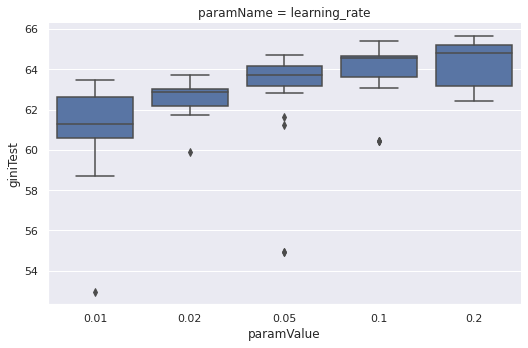

In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


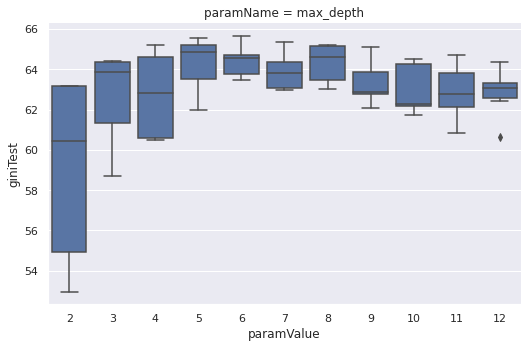

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [ ]:
import pickle

In [ ]:
xgBoost

In [ ]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [ ]:
loaded_model

In [ ]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

In [ ]:
loaded_model.predict(xgb.DMatrix(X_test[features], label = y_test))


array([0.05334991, 0.07263374, 0.0490824 , ..., 0.05132154, 0.14337361,
       0.05334991], dtype=float32)

---

# Gracias por completar este laboratorio!

---

